In [1]:
from sklearn.datasets import load_breast_cancer


breast_cancer = load_breast_cancer()


print(breast_cancer.data[:5])
print(breast_cancer.target[:5])


[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [2]:
print(f'Sample size: {breast_cancer.data.shape}')
print(f'Target size: {breast_cancer.target.shape}')


Sample size: (569, 30)
Target size: (569,)


In [3]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,
                                                    breast_cancer.target,
                                                    test_size=0.2,
                                                    random_state=11)


print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')


Training set size: (455, 30)
Testing set size: (114, 30)


In [4]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)


GaussianNB()

In [5]:
y_pred = nb.predict(X_test)
print(y_pred[:5])


[0 0 0 0 0]


In [6]:
accuracy = nb.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9385964912280702


In [7]:
from sklearn.metrics import confusion_matrix, classification_report


cm = confusion_matrix(y_test, y_pred)
print(cm)


report = classification_report(y_test, y_pred, target_names=['malignant', 'benign'])
print(report)


[[32  6]
 [ 1 75]]
              precision    recall  f1-score   support

   malignant       0.97      0.84      0.90        38
      benign       0.93      0.99      0.96        76

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



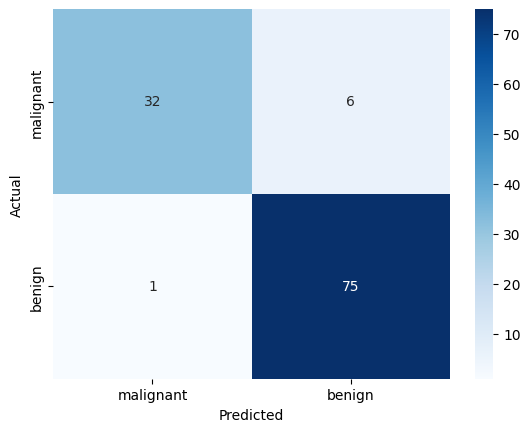

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [9]:
from sklearn.model_selection import KFold, cross_val_score


kfold = KFold(n_splits=10, random_state=11, shuffle=True)


scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')


Cross-validation scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean cross-validation score: 0.9384711779448622


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}


for name, model in estimators.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f'{name} accuracy: {score}')


GaussianNB accuracy: 0.9385964912280702
KNeighborsClassifier accuracy: 0.9473684210526315
LogisticRegression accuracy: 0.956140350877193
SVC accuracy: 0.9298245614035088
